Links:

Word2Vec - https://radimrehurek.com/gensim/models/word2vec.html#gensim.models.word2vec.Word2Vec

FastText - https://radimrehurek.com/gensim/auto_examples/tutorials/run_fasttext.html#sphx-glr-auto-examples-tutorials-run-fasttext-py

In [1]:
import re
import string
from nltk.corpus import stopwords
import os
from gensim.models import Word2Vec, FastText
from gensim import corpora
import numpy as np

In [2]:
# variables
file_path = "./raw_text/"
files = os.listdir(file_path)
files = [f for f in files if ".txt" in f]
print(files)

['anna.txt', 'war.txt', 'lav.txt', 'fel_dzer.txt', 'groza.txt']


In [3]:
documents = [open(file_path + d).read() for d in files]

In [4]:
# preprocessing of single document
def preprocess_document(document, full=1):
# 1. Remove all the special characters
    document = re.sub(r'\W', ' ', str(document))
# 2. Convert document to lowercase
    document = document.lower()
# 3. Remove punctuation
    document = document.translate(string.punctuation)
    document = re.sub(r'\s+', ' ', document, flags=re.I)
# 4. Remove whitespaces
    document = document.strip()
# 5. Tokenization
    document = document.split()
# 6. Remove stop-words
    if full == 1:
        stop_words = stopwords.words('russian')
        document = [i for i in document if i not in stop_words]
# 7. Remove short words
    if full == 1:
        document = [i for i in document if len(i) > 1]
    return document    

In [12]:
# preprocess documents
def preprocess_cor_documents(documents):
    tokenized_documents = [preprocess_document(doc) for doc in documents]
    return preprocessed_documents

In [13]:
# preprocessed documents
tokenized_documents = preprocess_cor_documents(documents)

In [14]:
# Create Dictionary
mydicrionary = corpora.Dictionary(tokenized_documents)

In [15]:
# Create the Corpus
mydict = corpora.Dictionary()
mycorpus = [mydict.doc2bow(doc, allow_update=True) for doc in preprocessed_documents]

Training Word2Vec

 Parameters:

 sentences(iterable of iterables, optional) - the sentences iterable can be simply a list of lists of tokens.
 corpus_file(str, optional) - path to a corpus file in LineSentence format.
 size(int, optional) - size of vector
 min_count(int, optional) - ignore words which appear less than min_count variable
 workers(int, optional) - count for parallel training. Need Cython installed.
 windows(int, optional) - maximum distance between the current and predicted word within a sentence.
 sg({0, 1}, optional) – training algorithm: 1 for skip-gram; otherwise CBOW.
 hs({0, 1}, optional) – If 1, hierarchical softmax will be used for model training.
     If 0, and negative is non-zero, negative sampling will be used.
 cbow_mean({0, 1}, optional) – If 0, use the sum of the context word vectors.
     If 1, use the mean, only applies when cbow is used.
 alpha(float, optional) – the initial learning rate.

In [7]:
# training cbow Word2Vec model
model_wv_cbow = Word2Vec(sentences=tokenized_documents size=100, min_count=2, window=10, sg=0)

In [28]:
# Training skip-gram Word2Vec model
model_wv_skip_gram = Word2Vec(sentences=tokenized_documents, size=100, min_count=2, window=10, sg=1)

In [7]:
# Training cbow FastText
model_ft = FastText(sentences=tokenized_documents, size=100, window=10, min_count=2)

In [16]:
# Training skip-gram FastText
model_ft_sg = FastText(sentences=tokenized_documents, size=100, window=10, min_count=2, sg=1)

In [ ]:
# save model
model_ft.save("model_ft.model")

In [ ]:
# load model
mod = FastText.load("model_ft.model")

In [8]:
def get_vect(old_text, new_text, vect, i):
    if old_text[i] in new_text:
        return vect[new_text.index(old_text[i])]
    else:
        return None

In [9]:
def get_vectors(text:string, model):
    if text == "":
        return None
    old_text = preprocess_document(text, full=0)
    new_text = preprocess_document(text)
    if new_text == []:
        return [None] * len(old_text)
    vect = model.wv[new_text]
    result = [get_vect(old_text, new_text, vect, i) for i in range(len(old_text))]
    return result

In [10]:
# Receive vectors from string
v = get_vectors("пример", model_ft_sg)

In [11]:
v

[array([-0.07799093, -0.98724556,  0.13121085,  0.9255666 ,  0.09431762,
        -0.1385675 ,  0.3003915 ,  0.22754012,  0.5577877 ,  0.8205174 ,
         0.10291892, -0.21871053, -0.11489373,  0.04657197, -0.29006442,
        -0.2661543 ,  0.8866404 , -1.0701476 , -1.0488906 ,  0.26778087,
         0.38740388,  0.02332336,  0.19763272, -0.25438488,  0.6453576 ,
         0.37524518,  0.70478994,  0.7469535 ,  0.363343  ,  0.56580716,
         0.04804358,  0.2136718 ,  0.51513666,  0.26970598, -0.1216715 ,
        -0.5276215 , -0.6214669 ,  0.5279445 ,  0.7449132 ,  0.12655437,
        -0.83592725, -0.84628767,  0.9284392 ,  0.9344948 , -0.15767695,
         0.2810917 ,  0.25853863,  0.4222324 ,  0.13669257, -0.5250268 ,
         0.06484531, -0.2514828 ,  0.33120596,  0.5561683 ,  0.07507797,
         0.23623434, -0.05633254,  0.13490196, -0.5845275 , -0.04670249,
         0.85874957,  0.1649541 , -0.41773078, -0.20426798, -0.2347065 ,
        -0.4842357 , -1.2415692 ,  0.89219785,  0.0

In [27]:
model_ft_sg.wv.most_similar("")

[('ела', 0.9999810457229614),
 ('ангела', 0.9999802112579346),
 ('учила', 0.9999784827232361),
 ('ждала', 0.9999784827232361),
 ('вала', 0.9999777674674988),
 ('ввела', 0.9999773502349854),
 ('сила', 0.9999766945838928),
 ('знала', 0.9999760389328003),
 ('желала', 0.999975860118866),
 ('мала', 0.9999758005142212)]

In [17]:
# Import for visualization
from sklearn.manifold import TSNE
import re
import matplotlib.pyplot as plt
import pandas as pd
import datetime

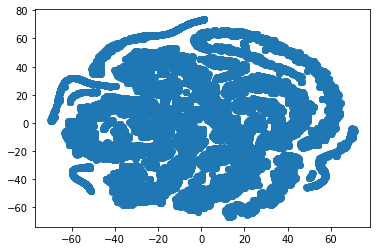

<bound method _AxesBase.set_ylim of <matplotlib.axes._subplots.AxesSubplot object at 0x12a4be2e8>>

In [18]:
# Visualization of vectors

model_name = model_ft_sg

vocab = list(model_name.wv.vocab)
X = model_name.wv[vocab]
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)
df = pd.DataFrame(X_tsne, index=vocab, columns=['x', 'y'])
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(df['x'], df['y'])

# Word's annotation
# for word, pos in df.iterrows():
# ax.annotate(word, pos)

plt.show()
ax.set_xlim
ax.set_ylim
    

In [19]:
# Save image
model_name = "model_ft_sg"
fig.savefig(fname="./result/%s_%s.png" % (model_name, datetime.datetime.now().strftime("%I:%M%p on %B %d, %Y")), quality=100)
print("saved")

saved
